In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Airline_Passengers_Dataset.csv")
df

,Month,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121
...,...,...
139,8/1/1960,606
140,9/1/1960,508
141,10/1/1960,461
142,11/1/1960,390


In [5]:
df.Month.dtype

dtype('O')

In [6]:
df['Month'] = pd.to_datetime(df['Month'])

In [7]:
df.Month.dtype

dtype('<M8[ns]')

In [8]:
X = df.set_index('Month')
X

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [9]:
from datetime import datetime
X['1949-03']

,Passengers
Month,
1949-03-01,132


In [10]:
X['1949-03':'1949-06']

,Passengers
Month,
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135


In [11]:
X['1949']

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [12]:
split = int(len(X)/2)
X1,X2 = X[:split],X[split:]
mean1,mean2 = X1.mean(),X2.mean()
var1,var2 = X1.var(),X2.var()
print('mean1=%f, mean2=%f' %(mean1,mean2))
print('var1=%f, var2=%f' %(var1,var2))

mean1=182.902778, mean2=377.694444
var1=2275.694640, var2=7471.736307


#### Graphical

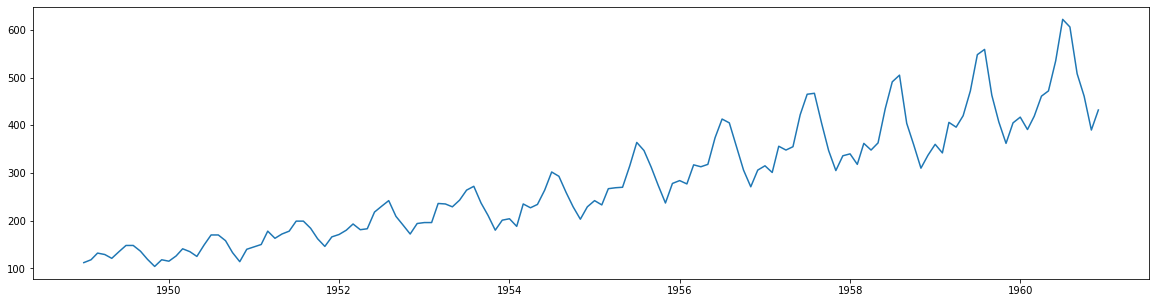

In [13]:
plt.figure(figsize=(20,5))
plt.plot(df['Month'],df['Passengers'])

In [14]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df['Passengers'])

In [15]:
test_result

(0.8153688792060462,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [16]:
print('p value of the test is %f' % test_result[1])

p value of the test is 0.991880


- Failed to reject Null Hypothesis

# Making Data Stationary

## 1. Differencing Method - Remove Mean Changing across Time

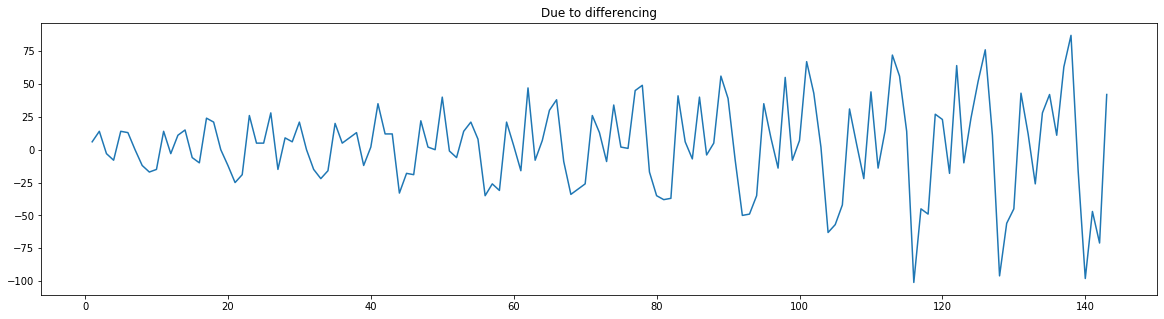

In [17]:
df['#Passengers_dif'] = df['Passengers']- df['Passengers'].shift(1)
plt.figure(figsize=(20,5))
df['#Passengers_dif'].dropna(inplace=True)
df['#Passengers_dif'].plot()
plt.title("Due to differencing")
plt.show()

## 2. Transformations - To remove Variance and Mean change across time

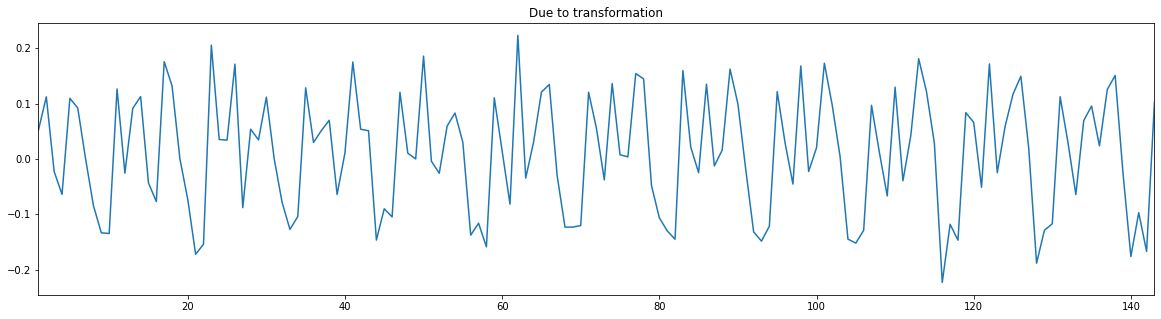

In [73]:
df['#Passengers_log'] = np.log(df['Passengers'])
df['#Passengers_log_dif'] = df['#Passengers_log']- df['#Passengers_log'].shift(1)
plt.figure(figsize=(20,5))
df['#Passengers_log_dif'].dropna(inplace=True)
df['#Passengers_log_dif'].plot()
plt.title("Due to transformation")
plt.show()

# Decompsoing Timeseries

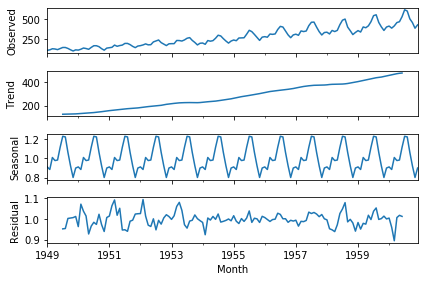

<Figure size 1440x360 with 0 Axes>

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose
X1 = df.set_index('Month')
decompse_result=seasonal_decompose(X1['Passengers'],model='multiplicative')
decompse_result.plot()
plt.figure(figsize=(20,5))
plt.show()

# ACF(Auto Correlation Function) and PACF(Partial Auto Correlation Function)- Plot

In [78]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(df['#Passengers_log_dif'],nlags=20)
lag_pacf = pacf(df['#Passengers_log_dif'],nlags=20,method='ols')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


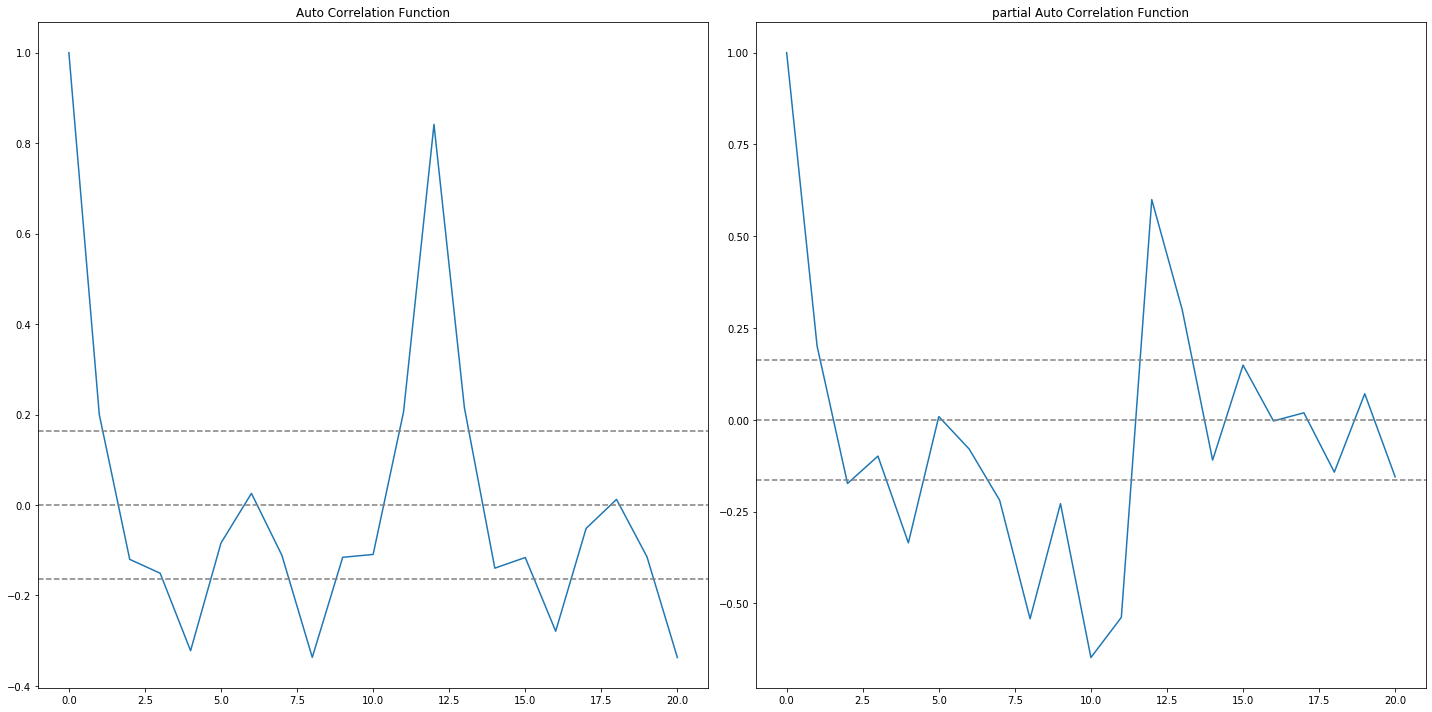

In [82]:
plt.figure(figsize=(20,10))
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df['#Passengers_log_dif'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df['#Passengers_log_dif'])),linestyle='--',color='gray')
plt.title('Auto Correlation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df['#Passengers_log_dif'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df['#Passengers_log_dif'])),linestyle='--',color='gray')
plt.title('partial Auto Correlation Function')

plt.tight_layout()

# ARIMA Model

In [94]:
from statsmodels.tsa.arima_model import ARIMA
train,test = df[:120],df[120:]
train['#Passengers_log_dif'].dropna(inplace=True)
test['#Passengers_log_dif'].dropna(inplace=True)
arima_model = ARIMA(train['#Passengers_log_dif'],order=(2,1,2))
results_arima = arima_model.fit(disp=-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [102]:
len(results_arima.forecast(steps=24)[0]),len(test['#Passengers_log_dif'])

(24, 24)

In [111]:
result_data = {'predict':np.exp(results_arima.forecast(steps=24)[0]),'Actual':np.exp(test['#Passengers_log_dif'])}
predicted_df = pd.DataFrame(result_data)
predicted_df

,predict,Actual
120,1.065316,1.068249
121,0.967608,0.950000
122,1.022609,1.187135
123,0.988622,0.975369
124,1.008892,1.060606
125,0.996352,1.123810
126,1.003738,1.161017
127,0.999054,1.020073
128,1.001692,0.828265
129,0.999892,0.879050


In [112]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predicted_df['Actual'],predicted_df['predict'])
mse

0.011588009364479806

In [113]:
np.sqrt(mse)

0.10764761662238419